
===== Iterações - Bissecção =====


,Iteração,θₖ,f(θₖ),|f(θₖ)|,Método
0,1,1.000000,322.571121,322.571121,Bissecção
1,2,0.750000,204.475769,204.475769,Bissecção
2,3,0.625000,81.213860,81.213860,Bissecção
3,4,0.562500,4.527011,4.527011,Bissecção
4,5,0.531250,-37.348038,37.348038,Bissecção
5,6,0.546875,-16.124449,16.124449,Bissecção
6,7,0.554688,-5.726552,5.726552,Bissecção
7,8,0.558594,-0.581649,0.581649,Bissecção
8,9,0.560547,1.977221,1.977221,Bissecção
9,10,0.559570,0.698920,0.698920,Bissecção



===== Iterações - Falsa Posição =====


,Iteração,θₖ,f(θₖ),|f(θₖ)|,Método
0,1,0.975532,3.186561e+02,3.186561e+02,Falsa Posição
1,2,0.596822,4.783179e+01,4.783179e+01,Falsa Posição
2,3,0.561005,2.575760e+00,2.575760e+00,Falsa Posição
3,4,0.559135,1.284678e-01,1.284678e-01,Falsa Posição
4,5,0.559042,6.382297e-03,6.382297e-03,Falsa Posição
5,6,0.559037,3.170113e-04,3.170113e-04,Falsa Posição
6,7,0.559037,1.574592e-05,1.574592e-05,Falsa Posição
7,8,0.559037,7.820986e-07,7.820986e-07,Falsa Posição



===== Iterações - Newton =====


,Iteração,θₖ,f(θₖ),|f(θₖ)|,Método
0,1,0.800000,241.982543,241.982543,Newton
1,2,0.444734,-164.708660,164.708660,Newton
2,3,0.550058,-11.871278,11.871278,Newton
3,4,0.558966,-0.093651,0.093651,Newton
4,5,0.559037,-0.000006,0.000006,Newton



===== Iterações - Secante =====


,Iteração,θₖ,f(θₖ),|f(θₖ)|,Método
0,1,0.700000,160.145461,160.145461,Secante
1,2,0.800000,241.982543,241.982543,Secante
2,3,0.504312,-75.250395,75.250395,Secante
3,4,0.574452,19.930849,19.930849,Secante
4,5,0.559764,0.953223,0.953223,Secante
5,6,0.559027,-0.013601,0.013601,Secante
6,7,0.559037,0.000009,0.000009,Secante



===== Resumo dos Resultados Finais =====


,Método,Iterações,θ final (rad),|f(θ final)|
0,Bissecção,26,0.559037,3.549042e-06
1,Falsa Posição,8,0.559037,7.820986e-07
2,Newton,5,0.559037,6.057641e-06
3,Secante,7,0.559037,8.971494e-06



✅ PDF gerado com sucesso: Questao1_CalculoNumerico_relatorio.pdf


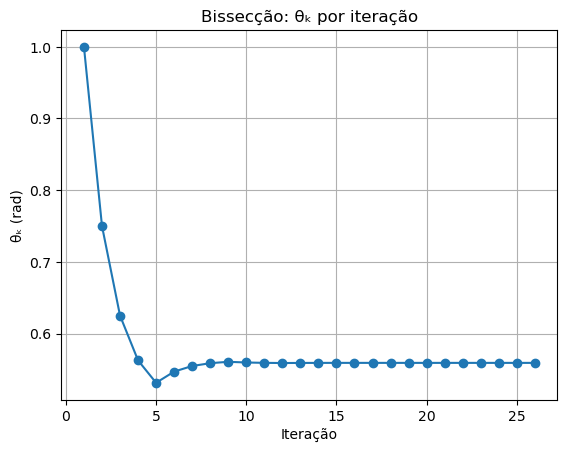

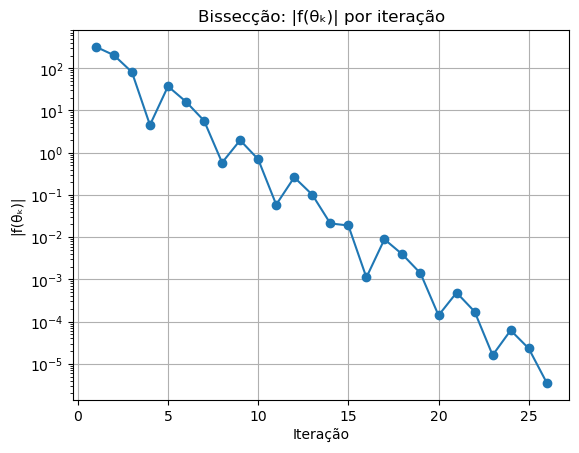

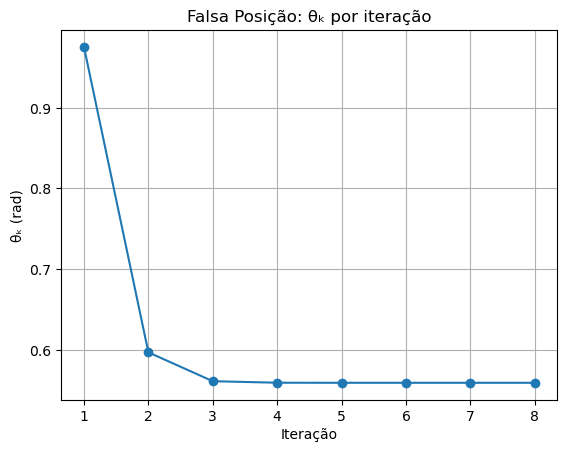

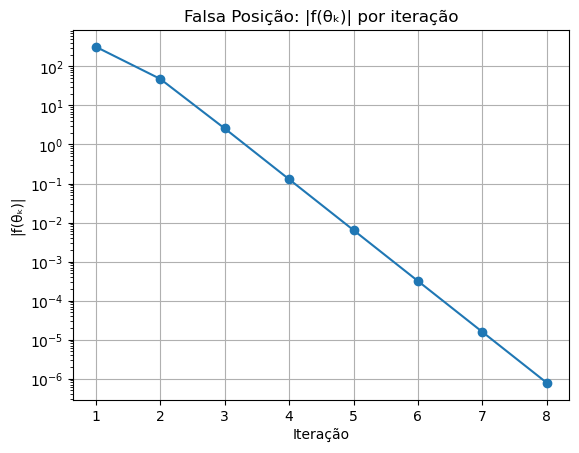

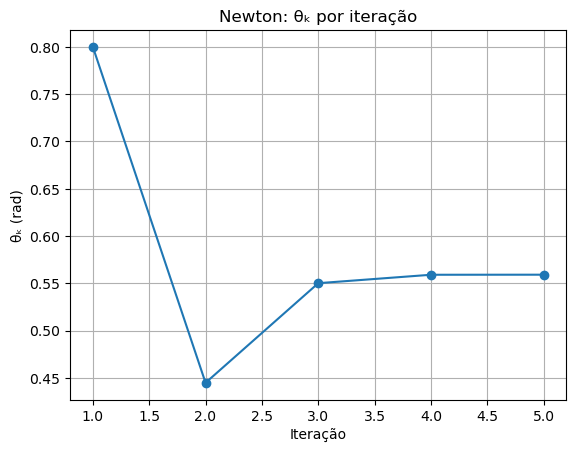

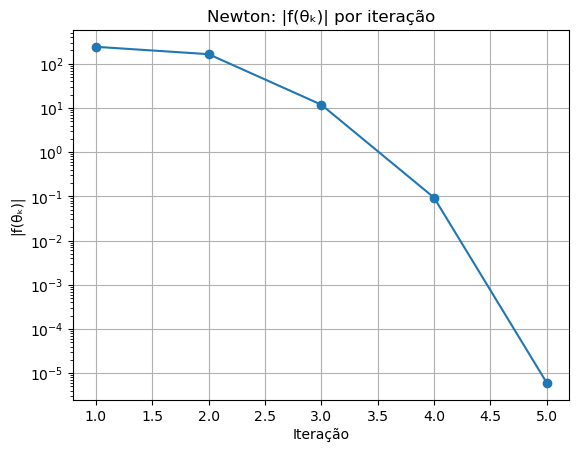

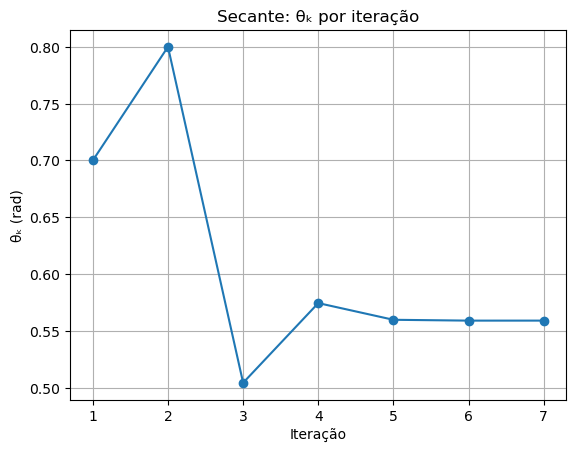

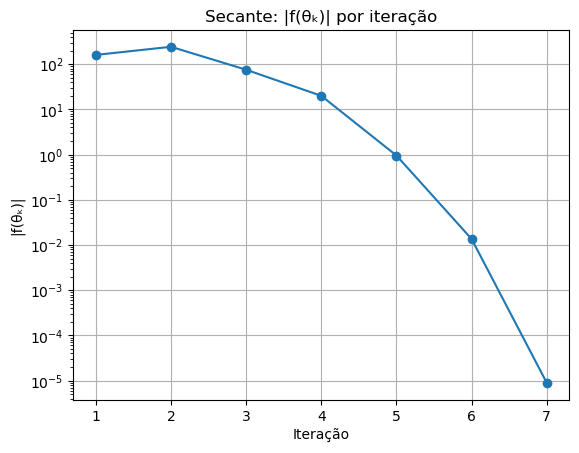

In [4]:
# ---- Questão 1 - Cálculo Numérico ----
# Resolução completa com 4 métodos numéricos, tabelas, gráficos e PDF final

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ---- Definição do problema ----
v0 = 100.0
g = 9.8
xtarget = 1000.0

def f(theta):
    return (v0**2/g) * (np.sin(theta) + 0.5*np.sin(2*theta)) - xtarget

def df(theta):
    return (v0**2/g) * (np.cos(theta) + np.cos(2*theta))

# ---- Métodos ----
def bisseccao(a, b, max_iter=100, tol=1e-5):
    fa, fb = f(a), f(b)
    historico = []
    if fa * fb > 0:
        raise ValueError("Bissecção requer f(a) e f(b) com sinais opostos.")
    for k in range(1, max_iter + 1):
        c = 0.5 * (a + b)
        fc = f(c)
        historico.append((k, c, fc, abs(fc)))
        if abs(fc) < tol:
            break
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return historico

def falsa_posicao(a, b, max_iter=100, tol=1e-5):
    fa, fb = f(a), f(b)
    historico = []
    if fa * fb > 0:
        raise ValueError("Falsa posição requer f(a) e f(b) com sinais opostos.")
    for k in range(1, max_iter + 1):
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)
        historico.append((k, c, fc, abs(fc)))
        if abs(fc) < tol:
            break
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return historico

def newton(x0, max_iter=100, tol=1e-5):
    historico = []
    x = x0
    for k in range(1, max_iter + 1):
        fx = f(x)
        dfx = df(x)
        historico.append((k, x, fx, abs(fx)))
        if abs(fx) < tol:
            break
        if dfx == 0:
            break
        x = x - fx / dfx
    return historico

def secante(x0, x1, max_iter=100, tol=1e-5):
    historico = []
    f0 = f(x0)
    f1 = f(x1)
    historico.append((1, x0, f0, abs(f0)))
    historico.append((2, x1, f1, abs(f1)))
    for k in range(3, max_iter + 1):
        denom = f1 - f0
        if denom == 0:
            break
        x2 = x1 - f1 * (x1 - x0) / denom
        f2 = f(x2)
        historico.append((k, x2, f2, abs(f2)))
        if abs(f2) < tol:
            break
        x0, f0 = x1, f1
        x1, f1 = x2, f2
    return historico

# ---- Execução dos métodos ----
a0, b0 = 0.5, 1.5
x0_newton = 0.8
x0_secant0, x0_secant1 = 0.7, 0.8

hist_bis = bisseccao(a0, b0)
hist_fp = falsa_posicao(a0, b0)
hist_new = newton(x0_newton)
hist_sec = secante(x0_secant0, x0_secant1)

# ---- Conversão para DataFrame ----
def hist_to_df(hist, metodo):
    df = pd.DataFrame(hist, columns=["Iteração", "θₖ", "f(θₖ)", "|f(θₖ)|"])
    df["Método"] = metodo
    return df

df_bis = hist_to_df(hist_bis, "Bissecção")
df_fp = hist_to_df(hist_fp, "Falsa Posição")
df_new = hist_to_df(hist_new, "Newton")
df_sec = hist_to_df(hist_sec, "Secante")

# ---- Exibir tabelas ----
print("\n===== Iterações - Bissecção =====")
display(df_bis)
print("\n===== Iterações - Falsa Posição =====")
display(df_fp)
print("\n===== Iterações - Newton =====")
display(df_new)
print("\n===== Iterações - Secante =====")
display(df_sec)

# ---- Resultados finais ----
def final_row(df):
    return df.iloc[-1]

resultados = pd.DataFrame({
    "Método": ["Bissecção", "Falsa Posição", "Newton", "Secante"],
    "Iterações": [final_row(df_bis)["Iteração"],
                  final_row(df_fp)["Iteração"],
                  final_row(df_new)["Iteração"],
                  final_row(df_sec)["Iteração"]],
    "θ final (rad)": [final_row(df_bis)["θₖ"],
                      final_row(df_fp)["θₖ"],
                      final_row(df_new)["θₖ"],
                      final_row(df_sec)["θₖ"]],
    "|f(θ final)|": [final_row(df_bis)["|f(θₖ)|"],
                     final_row(df_fp)["|f(θₖ)|"],
                     final_row(df_new)["|f(θₖ)|"],
                     final_row(df_sec)["|f(θₖ)|"]]
})

print("\n===== Resumo dos Resultados Finais =====")
display(resultados)

# ---- Função de plot ----
def plot_series(it, val, titulo, xlabel, ylabel, logy=False):
    plt.figure()
    plt.plot(it, val, marker='o')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if logy:
        plt.yscale("log")
    plt.grid(True)

def gerar_graficos(df, nome):
    it = df["Iteração"]
    th = df["θₖ"]
    er = df["|f(θₖ)|"]
    plot_series(it, th, f"{nome}: θₖ por iteração", "Iteração", "θₖ (rad)")
    plot_series(it, er, f"{nome}: |f(θₖ)| por iteração", "Iteração", "|f(θₖ)|", logy=True)

# ---- Gerar gráficos ----
gerar_graficos(df_bis, "Bissecção")
gerar_graficos(df_fp, "Falsa Posição")
gerar_graficos(df_new, "Newton")
gerar_graficos(df_sec, "Secante")

# ---- Gerar PDF ----
pdf_path = "Questao1_CalculoNumerico_relatorio.pdf"

with PdfPages(pdf_path) as pdf:
    # Capa
    plt.figure()
    plt.axis('off')
    texto = (
        "Trabalho Prático 1 - Cálculo Numérico (Questão 1)\n\n"
        "Função: f(θ) = (100² / 9.8) * (sin θ + 0.5 sin 2θ) - 1000\n"
        "Domínio: 0 ≤ θ ≤ π/2\n"
        "Critérios: |f(θ)| < 10⁻⁵ ou máx. 100 iterações\n\n"
        "Métodos: Bissecção, Falsa Posição, Newton e Secante"
    )
    plt.text(0.05, 0.9, texto, ha="left", va="top", wrap=True)
    pdf.savefig()
    plt.close()

    # Resultados Finais
    plt.figure()
    plt.axis("off")
    texto_resultados = "Resultados Finais:\n\n"
    for _, r in resultados.iterrows():
        texto_resultados += f"{r['Método']}: θ = {r['θ final (rad)']:.10f}, |f(θ)| = {r['|f(θ final)|']:.2e}, iterações = {int(r['Iterações'])}\n"
    plt.text(0.05, 0.9, texto_resultados, ha="left", va="top", wrap=True)
    pdf.savefig()
    plt.close()

    # Gráficos
    for fig_num in plt.get_fignums():
        pdf.savefig(fig_num)

    # Conclusão
    plt.figure()
    plt.axis("off")
    texto_conclusao = (
        "Conclusão:\n\n"
        "Todos os métodos convergiram para o mesmo valor de θ dentro do critério estabelecido.\n"
        "Métodos de Newton e Secante foram mais rápidos (menos iterações), "
        "enquanto Bissecção e Falsa Posição mostraram convergência mais lenta, porém estável."
    )
    plt.text(0.05, 0.9, texto_conclusao, ha="left", va="top", wrap=True)
    pdf.savefig()
    plt.close()

print(f"\n✅ PDF gerado com sucesso: {pdf_path}")


In [5]:
# ===========================================================
# Questão 2 - Cálculo Numérico
# Eliminação de Gauss com Pivoteamento Parcial
# ===========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# -----------------------------------------------------------
# Montagem do sistema (A·x = b)
# -----------------------------------------------------------

# Ordem das variáveis: x1, x2, x3, x4, x5, x6, x7
A = np.array([
    [-1,  0,  0,  0,  0,  0,  2],   # -x1 + 2x7 = 0
    [ 1, -1,  0,  0,  0,  0,  0],   # x1 - x2 = -130
    [ 0,  1, -1,  0,  0,  0,  0],   # x2 - x3 = 102
    [ 0,  0,  1, -1,  0,  0,  0],   # x3 - x4 = 22
    [ 0,  0,  0,  1, -1,  0,  0],   # x4 - x5 = -1
    [ 0,  0,  0,  0,  0,  1,  0],   # x6 = 29
    [ 0,  0,  0,  0,  1,  1, -1],   # x5 + x6 - x7 = 38
], dtype=float)

b = np.array([
    0,     # Eq1
    -130,  # Eq2
    102,   # Eq3
    22,    # Eq4
    -1,    # Eq5
    29,    # Eq6
    38     # Eq7
], dtype=float)

# -----------------------------------------------------------
# Função: Eliminação de Gauss com pivoteamento parcial
# -----------------------------------------------------------

def gauss_pivoteamento_parcial(A_in, b_in, mostrar_passos=3):
    A = A_in.copy().astype(float)
    b = b_in.copy().astype(float)
    n = len(b)
    passos = []  # armazenar as etapas
    
    # Etapa de eliminação
    for k in range(n-1):
        # Encontrar pivô (maior valor absoluto na coluna k)
        p = k + np.argmax(np.abs(A[k:, k]))
        if A[p, k] == 0:
            raise ValueError("Matriz singular detectada!")
        # Troca de linhas, se necessário
        if p != k:
            A[[k, p]] = A[[p, k]]
            b[[k, p]] = b[[p, k]]
        
        # Guardar matriz após pivoteamento
        if k < mostrar_passos:
            passos.append((f"Iteração {k+1} - Após pivoteamento", A.copy(), b.copy()))
        
        # Eliminação abaixo do pivô
        for i in range(k+1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]
            b[i] -= m * b[k]
        
        # Guardar matriz após eliminação
        if k < mostrar_passos:
            passos.append((f"Iteração {k+1} - Após eliminação", A.copy(), b.copy()))
    
    # Substituição regressiva
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x, passos

# -----------------------------------------------------------
# Executar o método
# -----------------------------------------------------------

x, passos = gauss_pivoteamento_parcial(A, b, mostrar_passos=3)

# -----------------------------------------------------------
# Mostrar resultados finais
# -----------------------------------------------------------

variaveis = [
    "x1 (IGU→GRU)",
    "x2 (GRU→Outros)",
    "x3 (Outros→GIG)",
    "x4 (GIG→POA)",
    "x5 (POA→CGH)",
    "x6 (SDU→CGH)",
    "x7 (CGH→IGU)"
]

df_resultado = pd.DataFrame({
    "Variável / Voo": variaveis,
    "Número de voos por dia": np.round(x, 6)
})

print("===== RESULTADOS FINAIS =====")
display(df_resultado)

# -----------------------------------------------------------
# Mostrar as 3 primeiras iterações (pivoteamento e eliminação)
# -----------------------------------------------------------

for titulo, A_pass, b_pass in passos:
    print("\n" + titulo)
    df_pass = pd.DataFrame(np.hstack([A_pass, b_pass.reshape(-1, 1)]),
                           columns=[f"x{j}" for j in range(1, 8)] + ["b"])
    display(df_pass.round(6))

# -----------------------------------------------------------
# (Opcional) Gerar relatório PDF com passos e resultado
# -----------------------------------------------------------

pdf_path = "Questao2_CalculoNumerico_relatorio.pdf"

with PdfPages(pdf_path) as pdf:
    # Capa
    plt.figure()
    plt.axis("off")
    texto_capa = (
        "Trabalho Prático 1 - Cálculo Numérico (Questão 2)\n\n"
        "Método: Eliminação de Gauss com Pivoteamento Parcial\n"
        "Sistema de 7 equações lineares baseado no balanço de voos.\n\n"
        "Critério: sistema completo e determinado (7x7)."
    )
    plt.text(0.05, 0.9, texto_capa, ha="left", va="top", wrap=True)
    pdf.savefig()
    plt.close()
    
    # Passos da eliminação
    for titulo, A_pass, b_pass in passos:
        plt.figure()
        plt.axis("off")
        plt.title(titulo)
        tabela = pd.DataFrame(np.hstack([A_pass, b_pass.reshape(-1, 1)]),
                              columns=[f"x{j}" for j in range(1, 8)] + ["b"])
        plt.text(0.01, 0.9, f"{titulo}\n\n{tabela.round(3).to_string(index=False)}", 
                 va="top", ha="left", family="monospace")
        pdf.savefig()
        plt.close()
    
    # Resultados finais
    plt.figure()
    plt.axis("off")
    plt.title("Resultados Finais")
    plt.text(0.01, 0.9, df_resultado.to_string(index=False), va="top", ha="left", family="monospace")
    pdf.savefig()
    plt.close()
    
    # Conclusão
    plt.figure()
    plt.axis("off")
    texto_conclusao = (
        "Conclusão:\n\n"
        "O método de eliminação de Gauss com pivoteamento parcial foi aplicado com sucesso.\n"
        "As três primeiras iterações mostraram o processo de redução da matriz aumentada.\n"
        "Os resultados finais apresentam o número de voos diários em cada trecho.\n"
    )
    plt.text(0.05, 0.9, texto_conclusao, ha="left", va="top", wrap=True)
    pdf.savefig()
    plt.close()

print(f"\n✅ Relatório PDF gerado: {pdf_path}")


===== RESULTADOS FINAIS =====


,Variável / Voo,Número de voos por dia
0,x1 (IGU→GRU),4.0
1,x2 (GRU→Outros),134.0
2,x3 (Outros→GIG),32.0
3,x4 (GIG→POA),10.0
4,x5 (POA→CGH),11.0
5,x6 (SDU→CGH),29.0
6,x7 (CGH→IGU),2.0



Iteração 1 - Após pivoteamento


,x1,x2,x3,x4,x5,x6,x7,b
0,-1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-130.0
2,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,102.0
3,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,22.0
4,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
6,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,38.0



Iteração 1 - Após eliminação


,x1,x2,x3,x4,x5,x6,x7,b
0,-1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.0,-1.0,0.0,0.0,0.0,0.0,2.0,-130.0
2,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,102.0
3,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,22.0
4,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
6,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,38.0



Iteração 2 - Após pivoteamento


,x1,x2,x3,x4,x5,x6,x7,b
0,-1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.0,-1.0,0.0,0.0,0.0,0.0,2.0,-130.0
2,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,102.0
3,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,22.0
4,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
6,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,38.0



Iteração 2 - Após eliminação


,x1,x2,x3,x4,x5,x6,x7,b
0,-1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.0,-1.0,0.0,0.0,0.0,0.0,2.0,-130.0
2,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,-28.0
3,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,22.0
4,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
6,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,38.0



Iteração 3 - Após pivoteamento


,x1,x2,x3,x4,x5,x6,x7,b
0,-1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.0,-1.0,0.0,0.0,0.0,0.0,2.0,-130.0
2,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,-28.0
3,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,22.0
4,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
6,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,38.0



Iteração 3 - Após eliminação


,x1,x2,x3,x4,x5,x6,x7,b
0,-1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.0,-1.0,0.0,0.0,0.0,0.0,2.0,-130.0
2,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,-28.0
3,0.0,0.0,0.0,-1.0,0.0,0.0,2.0,-6.0
4,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
6,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,38.0



✅ Relatório PDF gerado: Questao2_CalculoNumerico_relatorio.pdf


In [6]:
# ===========================================================
# Questão 3 - Cálculo Numérico
# Newton-Raphson multivariado em sistema não-linear (4 variáveis)
# Gera tabelas, 2 gráficos por caso e um PDF consolidado.
# ===========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ------------------------
# Parâmetros do problema
# ------------------------
L = 32000.0            # m
D = 0.6                # m
As = 60319.0           # m^2  (área de superfície)
# Ad = 0.2827          # m^2  (não é usado nas equações, mantido aqui apenas referência)
mdot = 44.0            # kg/s
Tsource = 10.0         # °C
Tamb = 4.0             # °C
rho = 950.0            # kg/m^3
v = 0.1638             # m/s
Cp = 2100.0            # J/(kg·K)
U = 0.510              # W/(m^2·K)
eta_bomba = 0.75       # -
Celet = 0.17           # USD/kWh
Ccalor = 0.05          # USD/kWh

# ------------------------
# Sistema F(x) = 0 e Jacobiano analítico
# x = [dp (MPa), Tin (°C), Tout (°C), mu (Pa·s)]
# ------------------------
def F(x):
    dp, Tin, Tout, mu = x

    # f1: perda de carga (laminar)
    f1 = dp*1e6 - (32.0 * mu * L * v) / (D**2)

    # f2: conservação de energia
    f2 = mdot*Cp*(Tin - Tout) - U*As * ( (Tin - Tamb) + (Tout - Tamb) )/2.0

    # f3: balanço econômico (potência de bombeamento + aquecimento)
    # Potência de bombeamento (W): Δp (Pa) * (m_dot/ρ) / η
    pump_power_W = (dp*1e6) * (mdot / (eta_bomba * rho))
    cost_elect_per_day = (pump_power_W/1000.0) * Celet * 24.0  # kW * custo * 24h

    # Potência térmica (W): m_dot * Cp * (Tin - Tsource)
    heat_power_W = mdot*Cp*(Tin - Tsource)
    cost_heat_per_day = (heat_power_W/1000.0) * Ccalor * 24.0

    f3 = 6100.0 - cost_elect_per_day - cost_heat_per_day

    # f4: modelo exponencial de viscosidade média
    term = 1100.0 * np.exp(-0.1 * (Tin + Tout)/2.0)
    f4 = mu - term

    return np.array([f1, f2, f3, f4], dtype=float)

def J(x):
    dp, Tin, Tout, mu = x

    # f1
    df1_ddp   = 1e6
    df1_dTin  = 0.0
    df1_dTout = 0.0
    df1_dmu   = -(32.0 * L * v) / (D**2)

    # f2
    alpha = U*As
    df2_ddp   = 0.0
    df2_dTin  = mdot*Cp - 0.5*alpha
    df2_dTout = -mdot*Cp - 0.5*alpha
    df2_dmu   = 0.0

    # f3
    df3_ddp   = -((1e6) * (mdot/(eta_bomba*rho)) / 1000.0) * Celet * 24.0
    df3_dTin  = -((mdot*Cp)/1000.0) * Ccalor * 24.0
    df3_dTout = 0.0
    df3_dmu   = 0.0

    # f4
    term = 1100.0 * np.exp(-0.1 * (Tin + Tout)/2.0)
    dterm_dTin  = term * (-0.1/2.0)
    dterm_dTout = term * (-0.1/2.0)
    df4_ddp   = 0.0
    df4_dTin  = -dterm_dTin     # f4 = mu - term
    df4_dTout = -dterm_dTout
    df4_dmu   = 1.0

    return np.array([
        [df1_ddp,  df1_dTin,  df1_dTout, df1_dmu],
        [df2_ddp,  df2_dTin,  df2_dTout, df2_dmu],
        [df3_ddp,  df3_dTin,  df3_dTout, df3_dmu],
        [df4_ddp,  df4_dTin,  df4_dTout, df4_dmu],
    ], dtype=float)

# ------------------------
# Método de Newton-Raphson (multivariado)
# ------------------------
def newton_system(x0, max_iter=100, tol=1e-5):
    x = np.array(x0, dtype=float)
    hist = [x.copy()]
    norms = []
    converged = False
    iters = 0

    for k in range(1, max_iter+1):
        Fx = F(x)
        normF = np.linalg.norm(Fx, 2)
        norms.append(normF)
        if normF <= tol:
            converged = True
            iters = k-1
            break

        Jx = J(x)
        try:
            s = np.linalg.solve(Jx, Fx)  # J * s = F
        except np.linalg.LinAlgError:
            converged = False
            iters = k-1
            break

        x = x - s
        hist.append(x.copy())
        iters = k

        if np.linalg.norm(F(x), 2) <= tol:
            converged = True
            break

    return {
        "x": x,
        "converged": converged,
        "iterations": iters,
        "history": np.array(hist),
        "norms": np.array(norms),
    }

# ------------------------
# Executar para os dois chutes iniciais
# ------------------------
x0_case1 = [1.0, 12.0, 10.0, 0.05]   # [Δp(MPa), Tin, Tout, μ]
x0_case2 = [15.0, 25.0, 10.0, 1.0]

res1 = newton_system(x0_case1, max_iter=100, tol=1e-5)
res2 = newton_system(x0_case2, max_iter=100, tol=1e-5)

# ------------------------
# Tabela-resumo
# ------------------------
def res_to_df(res, label):
    x = res["x"]
    return pd.DataFrame({
        "Caso": [label],
        "Convergiu?": [res["converged"]],
        "Iterações": [res["iterations"]],
        "Δp (MPa)": [x[0]],
        "Tin (°C)": [x[1]],
        "Tout (°C)": [x[2]],
        "μmed (Pa·s)": [x[3]],
        "||F(x)||": [np.linalg.norm(F(x),2)]
    })

df1 = res_to_df(res1, "x0=[1,12,10,0.05]")
df2 = res_to_df(res2, "x0=[15,25,10,1]")
df_summary = pd.concat([df1, df2], ignore_index=True)
df_summary_rounded = df_summary.copy()
for c in ["Δp (MPa)", "Tin (°C)", "Tout (°C)", "μmed (Pa·s)", "||F(x)||"]:
    df_summary_rounded[c] = df_summary_rounded[c].astype(float).round(6)

print("===== Tabela de Resultados (Resumo) =====")
display(df_summary_rounded)

# ------------------------
# Gráficos: dois por caso (Tin/Tout) e (Δp/μmed)
# ------------------------
def plot_case(res, case_name):
    hist = res["history"]
    its = np.arange(hist.shape[0])  # inclui ponto inicial (iteração 0)
    Tin_series  = hist[:,1]
    Tout_series = hist[:,2]
    dp_series   = hist[:,0]
    mu_series   = hist[:,3]

    figs = []

    # 1) Tin/Tout por iteração
    fig1 = plt.figure()
    plt.plot(its, Tin_series, marker='o', label="Tin")
    plt.plot(its, Tout_series, marker='s', label="Tout")
    plt.title(f"{case_name}: Evolução de Tin e Tout")
    plt.xlabel("Iteração (k)")
    plt.ylabel("Temperatura (°C)")
    plt.grid(True)
    plt.legend()
    figs.append(fig1)

    # 2) Δp/μmed por iteração
    fig2 = plt.figure()
    plt.plot(its, dp_series, marker='o', label="Δp (MPa)")
    plt.plot(its, mu_series, marker='s', label="μmed (Pa·s)")
    plt.title(f"{case_name}: Evolução de Δp e μmed")
    plt.xlabel("Iteração (k)")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.legend()
    figs.append(fig2)

    return figs

figs_case1 = plot_case(res1, "Caso 1 (x0=[1,12,10,0.05])")
figs_case2 = plot_case(res2, "Caso 2 (x0=[15,25,10,1])")

# ------------------------
# Gerar PDF no diretório atual (padrão das questões anteriores)
# ------------------------
pdf_path = "Questao3_CalculoNumerico_relatorio.pdf"  # <<< PADRÃO: salva na mesma pasta do notebook

with PdfPages(pdf_path) as pdf:
    # Capa
    plt.figure()
    plt.axis("off")
    cover = (
        "Trabalho Prático 1 - Cálculo Numérico (Questão 3)\n\n"
        "Resolução por Newton-Raphson multivariado\n"
        "Variáveis: Δp (MPa), Tin (°C), Tout (°C), μmed (Pa·s)\n"
        "Critérios: ||F(x)|| ≤ 1e-5 ou máx. 100 iterações\n"
        "Casos: x0=[1,12,10,0.05] e x0=[15,25,10,1]"
    )
    plt.text(0.05, 0.9, cover, ha="left", va="top", wrap=True)
    pdf.savefig()
    plt.close()

    # Tabela resumo
    plt.figure()
    plt.axis("off")
    plt.title("Resumo de Resultados")
    plt.text(0.01, 0.9, df_summary_rounded.to_string(index=False),
             va="top", ha="left", family="monospace")
    pdf.savefig()
    plt.close()

    # Gráficos (2 por caso)
    for fig in figs_case1 + figs_case2:
        pdf.savefig(fig)
        plt.close(fig)

    # Conclusão breve
    plt.figure()
    plt.axis("off")
    concl_lines = []
    for i, res in enumerate([res1, res2], start=1):
        status = "convergiu" if res["converged"] else "NÃO convergiu"
        concl_lines.append(
            f"Caso {i}: {status} em {res['iterations']} iterações; "
            f"||F|| final = {np.linalg.norm(F(res['x']),2):.3e}"
        )
    concl_text = "Conclusão:\n\n" + "\n".join(concl_lines)
    plt.text(0.05, 0.9, concl_text, ha="left", va="top", wrap=True)
    pdf.savefig()
    plt.close()

print(f"\n✅ Relatório PDF gerado com sucesso!: {pdf_path}")


===== Tabela de Resultados (Resumo) =====


,Caso,Convergiu?,Iterações,Δp (MPa),Tin (°C),Tout (°C),μmed (Pa·s),||F(x)||
0,"x0=[1,12,10,0.05]",True,9,6.423854,50.417201,37.168916,13.787461,0.000000
1,"x0=[15,25,10,1]",True,8,6.423856,50.417197,37.168913,13.787465,0.000001



✅ Relatório PDF gerado com sucesso!: Questao3_CalculoNumerico_relatorio.pdf
